In [1]:
import sys
import numpy as np
import collections
import math
import scipy.stats
import seaborn as sns
import pandas as pd


In [2]:
sns.set()

In [3]:
sys.path.insert(0, "../dist/hmm-0.0.1-py3.7-linux-x86_64.egg")

In [4]:
def generate_dataset(weights, means, n_samples=1000):
    weights = np.cumsum(weights)
    print(weights)
    counts = collections.Counter()
    distributions = [
        scipy.stats.poisson(m) for m in means
    ]
    results = []
    for i in range(n_samples):
        r = np.random.rand()
        #print(r)
        idx = (weights > r).argmax()    
        results.append(
            distributions[idx].rvs()
        )
    return results

In [5]:
weights = [.2, .5, .3]
means = [10, 20, 40]
mixtures = generate_dataset(weights, means, 1000)

[0.2 0.7 1. ]


/home/matthew/pkgsrc/install.20181009/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


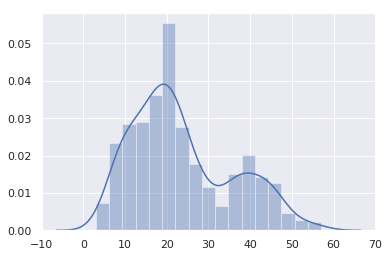

In [6]:
sns.distplot(mixtures)

In [7]:
def g(d1, mean):
    return mean**d1 * np.exp(-mean) / math.factorial(d1)

In [8]:
d1 = 3
q1 = .4 * g(d1, 7)
print("q1", q1)
q2 = .6 * g(d1, 8)
print("q2", q2)
print("denom", q1+q2)
print(q1/(q2+q1))
print(q2/(q2+q1))

q1 0.020851700945679938
q2 0.017175686548608605
denom 0.03802738749428854
0.5483337751985125
0.45166622480148755


In [9]:
data = {
    "D1": 1,
    "D2": 12,
    "D3": 3,
    "D4": 11,
    "D5": 15,
    "D6": 2,
    "D7": 9,
    "D8": 17,
    "D9": 20,
    "D10": 16
}
data =pd.Series(data)

In [10]:
gs = collections.defaultdict(dict)
for key, cnt in data.items():
    print(key, cnt)
    gs[key][1] = .4 * g(cnt, 7)
    gs[key][2] = .6 * g(cnt, 8)

D1 1
D2 12
D3 3
D4 11
D5 15
D6 2
D7 9
D8 17
D9 20
D10 16


In [11]:
sums = pd.DataFrame(gs).T.sum(axis=1)

In [12]:
sums

D1     0.004163
D2     0.039416
D3     0.038027
D4     0.061383
D5     0.006740
D6     0.015377
D7     0.115008
D8     0.001513
D9     0.000107
D10    0.003287
dtype: float64

In [13]:
f = pd.DataFrame(gs).T
f

1         2
D1   0.002553  0.001610
D2   0.010540  0.028876
D3   0.020852  0.017176
D4   0.018068  0.043314
D5   0.001324  0.005416
D6   0.008936  0.006441
D7   0.040562  0.074446
D8   0.000239  0.001274
D9   0.000012  0.000095
D10  0.000579  0.002708

In [14]:
probabilities = f.divide(sums, axis='index')

In [15]:
probabilities.sum()

1    3.299043
2    6.700957
dtype: float64

In [16]:

probabilities.multiply(data, axis="index").sum()

1    23.718317
2    82.281683
dtype: float64

In [17]:

probabilities.multiply(data, axis="index").sum() / probabilities.sum()

1     7.189454
2    12.279094
dtype: float64

In [18]:
probabilities.sum()/data.shape[0]

1    0.329904
2    0.670096
dtype: float64

In [19]:
import sklearn.base


In [20]:
means = np.asarray([ 6., 20.])
weights = np.asarray([.4, .6])

In [21]:
def g(observed, mean):
    return mean**observed * np.exp(-mean) / np.math.factorial(observed)

def poisson_mixture(means, weights, data, n_iter=100):
    
    means = np.asarray(means)
    weights = np.asarray(weights)
    data = np.asarray(data)
    for i in range(n_iter):
        probs = np.zeros((data.shape[0], means.shape[0]), dtype=float)
        for i in range(probs.shape[0]):
            for j in range(probs.shape[1]):
                probs[i, j] = weights[j] * g(data[i], means[j])

        probs /= probs.sum(axis=1)[:, None]

        mixture_sums = probs.sum(axis=0)
        mixture_weighted_sums = (probs * data[:, None]).sum(axis=0)

        print(mixture_sums)
        print(mixture_weighted_sums)

        weights = mixture_sums / data.shape[0]
        means = mixture_weighted_sums / mixture_sums

        print(weights)
        print(means)
    return probs






In [22]:
p = poisson_mixture(means, weights, data.values)

[4.84181252 5.15818748]
[24.74758074 81.25241926]
[0.48418125 0.51581875]
[ 5.11122242 15.75212604]
[3.80385556 6.19614444]
[13.69332764 92.30667236]
[0.38038556 0.61961444]
[ 3.59985478 14.89743716]
[3.13025605 6.86974395]
[ 7.20617998 98.79382002]
[0.3130256 0.6869744]
[ 2.3021056 14.3810047]
[3.0020812 6.9979188]
[ 6.04127991 99.95872009]
[0.30020812 0.69979188]
[ 2.01236393 14.28406401]
[2.99752897 7.00247103]
[ 6.00565401 99.99434599]
[0.2997529 0.7002471]
[ 2.00353494 14.27986571]
[2.99741785 7.00258215]
[ 6.00490292 99.99509708]
[0.29974178 0.70025822]
[ 2.00335863 14.27974637]
[2.99741543 7.00258457]
[ 6.0048872 99.9951128]
[0.29974154 0.70025846]
[ 2.00335501 14.27974368]
[2.99741537 7.00258463]
[ 6.00488687 99.99511313]
[0.29974154 0.70025846]
[ 2.00335493 14.27974362]
[2.99741537 7.00258463]
[ 6.00488687 99.99511313]
[0.29974154 0.70025846]
[ 2.00335493 14.27974362]
[2.99741537 7.00258463]
[ 6.00488686 99.99511314]
[0.29974154 0.70025846]
[ 2.00335493 14.27974362]
[2.9974153

In [23]:
g(data.values[0], means)

array([1.48725131e-02, 4.12230724e-08])

In [25]:
from hmm import PoissonMixtureModel

In [34]:
earthquake_data = """13
 14
 8
 10
 16
 26
 32
 27
 18
 32
 36
 24
 22
 23
 22
 18
 25
 21
 21
 14
8
 11
 14
 23
 18
 17
 19
 20
 22
 19
 13
 26
 13
 14
 22
 24
 21
 22
 26
 21
23
 24
 27
 41
 31
 27
 35
 26
 28
 36
 39
 21
 17
 22
 17
 19
 15
 34
 10
 15
22
 18
 15
 20
 15
 22
 19
 16
 30
 27
 29
 23
 20
 16
 21
 21
 25
 16
 18
 15
18
 14
 10
 15
 8
 15
 6
 11
 8
 7
 18
 16
 13
 12
 13
 20
 15
 16
 12
 18
15
 16
 13
 15
 16
 11
 11
"""
earthquake_data = pd.Series([int(i) for i in earthquake_data.split()])


class PoissonMixture(sklearn.base.TransformerMixin):
    def __init__(self, n_components=3, init_means=True, init_weights=True, n_iter=100, tol=1e-6, random_state=None):
        self.init_means = init_means
        self.n_components = n_components
        self.init_weights = init_weights
        self.n_iter = n_iter
        self.tol = tol
        self.random_state = sklearn.utils.check_random_state(random_state)
        
        self.means_ = None
        self.weights_ = None
        self.loglikelihoods_ = []
    
    @staticmethod 
    def _g(observed, mean):
        return mean**observed * np.exp(-mean) / np.math.factorial(observed)

    @classmethod
    def _compute_probabilities(cls, means, weights, X):
        assert weights.shape == means.shape, (weights.shape, means.shape)
        probs = np.repeat(weights, X.shape[0]).reshape(weights.shape[0], X.shape[0]).T
        for row in range(probs.shape[0]):
            for col in range(probs.shape[1]):
                q = cls._g(X[row][0], means[col])
                probs[row, col] *= q
        return probs
    
    def fit(self, X):
        sklearn.utils.check_array(X)
        means = self.means_
        weights = self.weights_
        if self.init_means:
            percentiles = 100 * np.arange(1, self.n_components+1) / (self.n_components + 1)
            means = np.percentile(X.ravel(), percentiles)
        assert means is not None
        if self.init_weights:
            weights = self.random_state.rand(self.n_components)
        assert np.all(weights >= 0)
        # Mixture Weights must sum to 1
        weights /= weights.sum()

        assert weights is not None
        
        for i in range(self.n_iter):
            probs = self._compute_probabilities(means, weights, X)
            # Log Likelihood is the log of the sum of the unnormalized
            # probability of belonging to each mixture, summed over all data
            ll = self._score(X)
            
            # Normalize Probabilities
            probs /= probs.sum(axis=1)[:, None]
            mixture_sums = probs.sum(axis=0)
            mixture_weighted_sums = (probs * X).sum(axis=0)
            
            
            weights = mixture_sums / X.shape[0]
            means = mixture_weighted_sums / mixture_sums
            self.loglikelihoods_.append(ll)
            if i > 0 and np.abs(self.loglikelihoods_[-2] - ll) <= self.tol:
                break
            
        self.means_ = means
        self.weights_ = weights
    
    def score(self, X):
        return self._score(self._compute_probabilities(self.means_, self.weights_, X))
    
    def _score(self, probs):
        return np.log(probs.sum(axis=1)).sum()
    
    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)
    
    def predict_proba(self, X):
        probs = self._compute_probabilities(self.means_, self.weights_, X)
        # Normalize Probabilities
        probs /= probs.sum(axis=1)[:, None]
        return probs

In [26]:
pm = PoissonMixtureModel.PoissonMixture(2, True, True, 10)
#pm.means_ = means
#pm.weights_ = weights

pm.fit(data.values[:, None])
print(pm.means_)
print(pm.weights_)

[ 2.00335509 14.27974374]
[0.29974155 0.70025845]


In [28]:
pd.Series(pm.predict_proba(data.values[:, None]).argmax(axis=1), index=data.values)

1     0
12    1
3     0
11    1
15    1
2     0
9     1
17    1
20    1
16    1
dtype: int64

In [29]:
pm.loglikelihoods_

[-38.69310406273291,
 -33.50713998270295,
 -30.993924624229148,
 -29.360773710927344,
 -29.205597759191306,
 -29.205311813797273,
 -29.205311685572532]

In [30]:
pm.weights_

array([0.29974155, 0.70025845])

In [31]:
pm.score(data.values[:, None])

-29.205311685516346

In [35]:
pm1 = PoissonMixtureModel.PoissonMixture(1, init_means=True, init_weights=True, n_iter=50)
pm1.fit(earthquake_data[:, None])

In [36]:
pm1.means_, pm1.weights_, pm.loglikelihoods_


(array([19.36448598]),
 array([1.]),
 [-38.69310406273291,
  -33.50713998270295,
  -30.993924624229148,
  -29.360773710927344,
  -29.205597759191306,
  -29.205311813797273,
  -29.205311685572532])

In [37]:
pm2 = PoissonMixtureModel.PoissonMixture(2, init_means=True, init_weights=True, n_iter=50)
pm2.fit(earthquake_data[:, None])
print(pm2.means_)
print(pm2.weights_)
print(pm2.loglikelihoods_[-1])

[15.75661244 26.79673725]
[0.67320356 0.32679644]
-360.36941457176266


In [38]:
pm3 = PoissonMixtureModel.PoissonMixture(3, init_means=True, init_weights=True, n_iter=50)
pm3.fit(earthquake_data[:, None])
print(pm3.means_)
print(pm3.weights_)
print(pm3.loglikelihoods_[-1])

[14.96662248 20.97269925 28.80732609]
[0.53670972 0.25711498 0.2061753 ]
-358.6540859753976


In [39]:
pm4 = PoissonMixtureModel.PoissonMixture(4, init_means=True, init_weights=True, n_iter=50)
pm4.fit(earthquake_data[:, None])
print(pm4.means_)
print(pm4.weights_)
print(pm4.loglikelihoods_[-1])

[10.87801332 16.5204527  21.3548995  31.79392133]
[0.11987006 0.41426028 0.34438599 0.12148367]
-356.76036116709315


In [ ]:
pm1.weights_